# *`Innomatics Research Labs`* - Internship Hackathon 

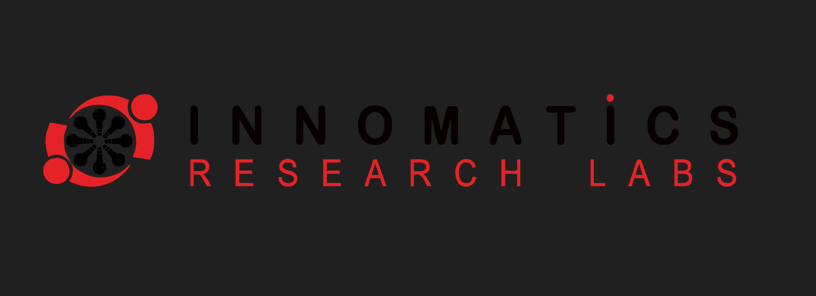

### Importing the important libraries

In [3]:
import pandas as pd 
import matplotlib.pyplot as plt

### Importing the datasets given

In [5]:
df_1_links_dataset = pd.read_csv(r"D:\Machine Learning Nagaraju\Hackathon\movie_data\links.csv")
df_2_movies_dataset = pd.read_csv(r"D:\Machine Learning Nagaraju\Hackathon\movie_data\movies.csv")
df_3_ratings_dataset = pd.read_csv(r"D:\Machine Learning Nagaraju\Hackathon\movie_data\ratings.csv")
df_4_tags_dataset = pd.read_csv(r"D:\Machine Learning Nagaraju\Hackathon\movie_data\tags.csv")

In [6]:
df_1_links_dataset

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0
...,...,...,...
9737,193581,5476944,432131.0
9738,193583,5914996,445030.0
9739,193585,6397426,479308.0
9740,193587,8391976,483455.0


In [7]:
df_1_links_dataset.shape

(9742, 3)

In [8]:
df_2_movies_dataset

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [9]:
df_2_movies_dataset.shape

(9742, 3)

In [10]:
df_3_ratings_dataset

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [11]:
df_3_ratings_dataset.shape

(100836, 4)

In [12]:
df_4_tags_dataset

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200
...,...,...,...,...
3678,606,7382,for katie,1171234019
3679,606,7936,austere,1173392334
3680,610,3265,gun fu,1493843984
3681,610,3265,heroic bloodshed,1493843978


In [13]:
df_4_tags_dataset.shape

(3683, 4)

### Download the data from the above link. How many ".csv" files are available in the dataset?

#### Ans: 4

### What is the shape of "movies.csv"?
#### Ans: (9742, 3)

### What is the shape of "ratings.csv"?
#### Ans: (100836, 4)

### How many unique "userId" are available in "ratings.csv"?


In [18]:
unique_users = df_3_ratings_dataset['userId'].nunique()

unique_users

610

### Which movie has recieved maximum number of user ratings?

In [20]:
# Grouping the ratings by movieId and counting the number of ratings for each movie
movie_rating_counts = df_3_ratings_dataset.groupby('movieId').size()

# Finding the movie with the maximum number of ratings
max_rated_movie_id = movie_rating_counts.idxmax()

# Finding the title of the movie with the maximum number of ratings
max_rated_movie_title = df_2_movies_dataset[df_2_movies_dataset['movieId'] == max_rated_movie_id]['title'].iloc[0]

print("Movie with the maximum number of ratings:", max_rated_movie_title)
print("Movie ID with the maximum number of ratings:", max_rated_movie_id)

Movie with the maximum number of ratings: Forrest Gump (1994)
Movie ID with the maximum number of ratings: 356


### Select all the correct tags submitted by users to "Matrix, The (1999)" movie?

In [22]:
# Finding the movieId for "Matrix, The (1999)"

matrix_movie = df_2_movies_dataset[df_2_movies_dataset['title'] == 'Matrix, The (1999)']
matrix_movie_id = matrix_movie['movieId'].values[0]

# Filtering tags for the movie with its movieId
matrix_tags = df_4_tags_dataset[df_4_tags_dataset['movieId'] == matrix_movie_id]

# Displaying unique tags for the movie
unique_tags = matrix_tags['tag'].unique()
print("Tags for 'Matrix, The (1999)':")
pd.DataFrame(unique_tags)

Tags for 'Matrix, The (1999)':


,0
0,martial arts
1,sci-fi
2,alternate universe
3,philosophy
4,post apocalyptic


### What is the average user rating for movie named "Terminator 2: Judgment Day (1991)"?

In [24]:
# Finding the movieId for "Terminator 2: Judgment Day (1991)"
terminator_movie = df_2_movies_dataset[df_2_movies_dataset['title'] == 'Terminator 2: Judgment Day (1991)']

if not terminator_movie.empty:
    terminator_movie_id = terminator_movie.iloc[0]['movieId']

    # Calculating the average user rating for the movie
    average_rating = df_3_ratings_dataset[df_3_ratings_dataset['movieId'] == terminator_movie_id]['rating'].mean()
    
    print(f"Average user rating for 'Terminator 2: Judgment Day (1991)': {average_rating:.2f}")
else:
    print("Movie not found")

Average user rating for 'Terminator 2: Judgment Day (1991)': 3.97


### How does the data distribution of user ratings for "Fight Club (1999)" movie looks like?

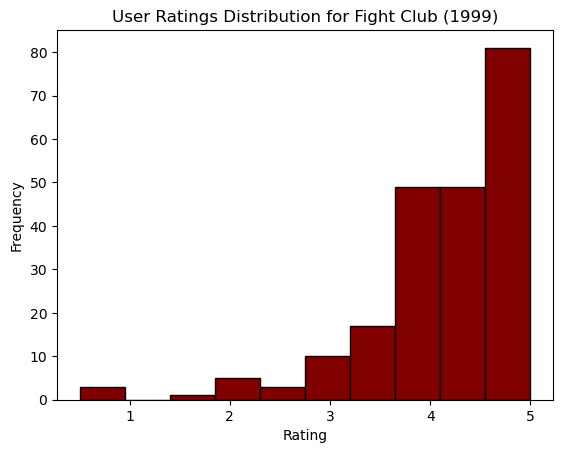

In [105]:
# Finding the movieId for "Fight Club (1999)"
fight_club_movie = df_2_movies_dataset[df_2_movies_dataset['title'] == 'Fight Club (1999)']

if not fight_club_movie.empty:
    fight_club_movie_id = fight_club_movie.iloc[0]['movieId']

    # Filtering ratings for the movie
    fight_club_ratings = df_3_ratings_dataset[df_3_ratings_dataset['movieId'] == fight_club_movie_id]['rating']

    # Plotting the histogram of user ratings for "Fight Club (1999)"
    plt.hist(fight_club_ratings, bins=10, edgecolor='black',color='maroon')
    plt.xlabel('Rating')
    plt.ylabel('Frequency')
    plt.title('User Ratings Distribution for Fight Club (1999)')
    plt.show()
else:
    print("Movie not found")

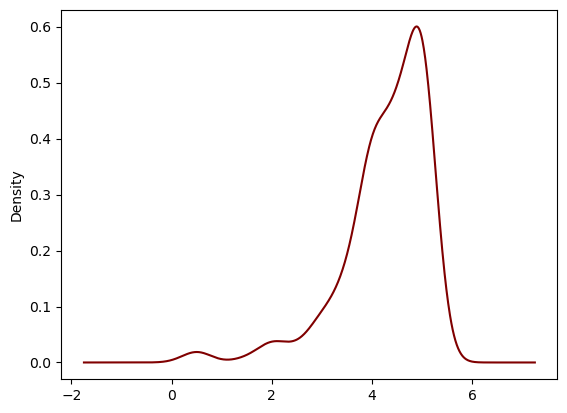

In [107]:
fight_club_ratings = df_3_ratings_dataset[df_3_ratings_dataset['movieId'] == fight_club_movie_id]['rating'].plot(kind='kde',color='maroon')

##### clearly we see that the graph is left-skewed from Kernal density estimate plot

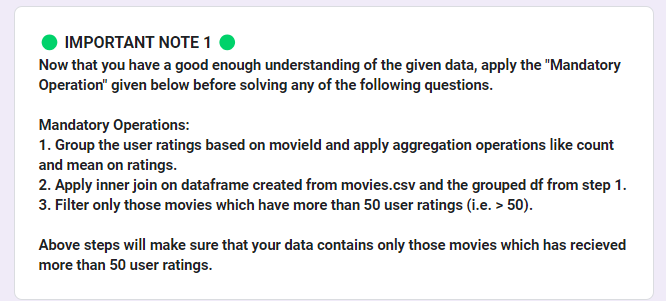

In [30]:
# Grouping user ratings by movieId and apply count and mean operations
grouped_ratings = df_3_ratings_dataset.groupby('movieId')['rating'].agg(['count', 'mean']).reset_index()

# Renaming columns for clarity
grouped_ratings.columns = ['movieId', 'rating_count', 'rating_mean']

# Merging movies data with grouped ratings using inner join
merged_data = pd.merge(df_2_movies_dataset, grouped_ratings, on='movieId', how='inner')

# Filtering movies with more than 50 user ratings
filtered_data = merged_data[merged_data['rating_count'] > 50]

# Displaying the resulting dataset
filtered_data.head()

,movieId,title,genres,rating_count,rating_mean
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,110,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,52,3.259615
5,6,Heat (1995),Action|Crime|Thriller,102,3.946078
6,7,Sabrina (1995),Comedy|Romance,54,3.185185


### Which movie is the most popular based on  average user ratings?*

In [32]:
# Sorting the filtered dataset by 'rating_mean' in descending order
sorted_data = filtered_data.sort_values(by='rating_mean', ascending=False)

# Getting the most popular movie (highest average rating)
most_popular_movie = sorted_data.iloc[0]

print("Most popular movie based on average user ratings:")
print("Title:", most_popular_movie['title'])
print("Average Rating:", most_popular_movie['rating_mean'])

Most popular movie based on average user ratings:
Title: Shawshank Redemption, The (1994)
Average Rating: 4.429022082018927


### Select all the correct options which comes under top 5 popular movies based on number of user ratings.

In [34]:
# Sorting the filtered dataset by 'rating_count' in descending order
sorted_by_ratings_count = filtered_data.sort_values(by='rating_count', ascending=False)

# Getting the top 5 popular movies based on number of user ratings
top_5_popular_movies = sorted_by_ratings_count.head(5)

# Displaying the titles of the top 5 popular movies
print("Top 5 popular movies based on number of user ratings:")
top_5_popular_movies[['title', 'rating_count']]

Top 5 popular movies based on number of user ratings:


,title,rating_count
314,Forrest Gump (1994),329
277,"Shawshank Redemption, The (1994)",317
257,Pulp Fiction (1994),307
510,"Silence of the Lambs, The (1991)",279
1938,"Matrix, The (1999)",278


### Which Sci-Fi movie is "third most popular" based on the number of user ratings?

In [36]:
# Filtering the dataset for Sci-Fi movies
sci_fi_movies = filtered_data[filtered_data['genres'].str.contains('Sci-Fi')]

# Sorting the Sci-Fi movies by 'rating_count' in descending order
sorted_sci_fi_by_ratings = sci_fi_movies.sort_values(by='rating_count', ascending=False)

# Getting the third most popular Sci-Fi movie based on number of user ratings
third_most_popular_sci_fi = sorted_sci_fi_by_ratings.iloc[2]  # Index 2 for the third movie (0-indexed)

print("Third most popular Sci-Fi movie based on number of user ratings:")
print("Title:", third_most_popular_sci_fi['title'])
print("Number of User Ratings:", third_most_popular_sci_fi['rating_count'])

Third most popular Sci-Fi movie based on number of user ratings:
Title: Jurassic Park (1993)
Number of User Ratings: 238


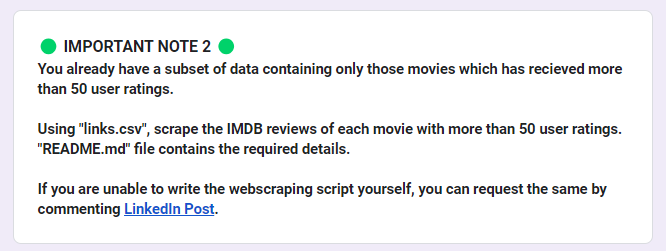

## webscraping code:

In [39]:
import requests
import numpy as np
from bs4 import BeautifulSoup  
def scrapper(imdbId):
    id = str(int(imdbId))
    n_zeroes = 7 - len(id)
    new_id = "0"*n_zeroes + id
    URL = f"https://www.imdb.com/title/tt{new_id}/"
    request_header = {'Content-Type': 'text/html; charset=UTF-8', 
                      'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:109.0) Gecko/20100101 Firefox/119.0', 
                      'Accept-Encoding': 'gzip, deflate, br'}
    response = requests.get(URL, headers=request_header)  
    soup = BeautifulSoup(response.text, 'html.parser')  
    imdb_rating = soup.find('span', {'itemprop': 'ratingValue'})  
    return imdb_rating.text if imdb_rating else np.nan

#### using the datasets we have, finding the solution 

In [41]:
df_links = pd.read_csv(r"D:\Machine Learning Nagaraju\Hackathon\movie_data\links.csv")


### Mention the movieId of the movie which has the highest IMDB rating.


In [43]:
df_links

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0
...,...,...,...
9737,193581,5476944,432131.0
9738,193583,5914996,445030.0
9739,193585,6397426,479308.0
9740,193587,8391976,483455.0


In [44]:
merged_links_data_df = pd.merge(merged_data, df_links, on='movieId', how='inner')


In [45]:
merged_links_data_df

,movieId,title,genres,rating_count,rating_mean,imdbId,tmdbId
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215,3.920930,114709,862.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,110,3.431818,113497,8844.0
2,3,Grumpier Old Men (1995),Comedy|Romance,52,3.259615,113228,15602.0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,7,2.357143,114885,31357.0
4,5,Father of the Bride Part II (1995),Comedy,49,3.071429,113041,11862.0
...,...,...,...,...,...,...,...
9719,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,1,4.000000,5476944,432131.0
9720,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,1,3.500000,5914996,445030.0
9721,193585,Flint (2017),Drama,1,3.500000,6397426,479308.0
9722,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,1,3.500000,8391976,483455.0


In [46]:
df_3_ratings_dataset

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [47]:
merged_links_data_ratings_data_df = pd.merge(merged_links_data_df, df_3_ratings_dataset, on='movieId', how='inner')


In [48]:
merged_links_data_ratings_data_df

,movieId,title,genres,rating_count,rating_mean,imdbId,tmdbId,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215,3.92093,114709,862.0,1,4.0,964982703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215,3.92093,114709,862.0,5,4.0,847434962
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215,3.92093,114709,862.0,7,4.5,1106635946
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215,3.92093,114709,862.0,15,2.5,1510577970
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215,3.92093,114709,862.0,17,4.5,1305696483
...,...,...,...,...,...,...,...,...,...,...
100831,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,1,4.00000,5476944,432131.0,184,4.0,1537109082
100832,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,1,3.50000,5914996,445030.0,184,3.5,1537109545
100833,193585,Flint (2017),Drama,1,3.50000,6397426,479308.0,184,3.5,1537109805
100834,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,1,3.50000,8391976,483455.0,184,3.5,1537110021


In [49]:
avg_rat = merged_links_data_ratings_data_df.groupby('movieId')['rating'].mean().reset_index()


In [50]:
avg_rat

,movieId,rating
0,1,3.920930
1,2,3.431818
2,3,3.259615
3,4,2.357143
4,5,3.071429
...,...,...
9719,193581,4.000000
9720,193583,3.500000
9721,193585,3.500000
9722,193587,3.500000


In [51]:
highest_IMDB_rating = avg_rat.loc[avg_rat['rating'].idxmax()]


In [52]:
highest_IMDB_rating

movieId    53.0
rating      5.0
Name: 48, dtype: float64

### Mention the movieId of the "Sci-Fi" movie which has the highest IMDB rating.

In [54]:
sci_fi_movies = merged_links_data_ratings_data_df[merged_links_data_ratings_data_df['genres'].str.contains('Sci-Fi')]


In [55]:
sci_fi_movies

,movieId,title,genres,rating_count,rating_mean,imdbId,tmdbId,userId,rating,timestamp
1286,24,Powder (1995),Drama|Sci-Fi,28,3.125000,114168,12665.0,6,4.0,845554397
1287,24,Powder (1995),Drama|Sci-Fi,28,3.125000,114168,12665.0,32,3.0,856737205
1288,24,Powder (1995),Drama|Sci-Fi,28,3.125000,114168,12665.0,71,2.0,864740028
1289,24,Powder (1995),Drama|Sci-Fi,28,3.125000,114168,12665.0,111,2.5,1518640854
1290,24,Powder (1995),Drama|Sci-Fi,28,3.125000,114168,12665.0,181,3.0,845470571
...,...,...,...,...,...,...,...,...,...,...
100806,188301,Ant-Man and the Wasp (2018),Action|Adventure|Comedy|Fantasy|Sci-Fi,3,3.666667,5095030,363088.0,596,4.0,1535709468
100816,189547,Iron Soldier (2010),Action|Sci-Fi,1,1.000000,1665744,111196.0,210,1.0,1528486011
100818,190183,The Darkest Minds (2018),Sci-Fi|Thriller,1,3.500000,4073790,445651.0,50,3.5,1533302021
100825,191005,Gintama (2017),Action|Adventure|Comedy|Sci-Fi,1,4.500000,5805470,432985.0,184,4.5,1537109489


In [56]:
high_rated_sci_fi_movie = sci_fi_movies.loc[sci_fi_movies['rating'].idxmax()]


In [57]:
high_rated_sci_fi_movie

movieId                    24
title           Powder (1995)
genres           Drama|Sci-Fi
rating_count               28
rating_mean             3.125
imdbId                 114168
tmdbId                12665.0
userId                    234
rating                    5.0
timestamp          1004407893
Name: 1293, dtype: object

In [58]:
print("MovieId of the highest rated Sci-Fi movie:", high_rated_sci_fi_movie['movieId'])


MovieId of the highest rated Sci-Fi movie: 24
